In [3]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [23]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_450_ssim_seperate'

xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [24]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_450_ssim_seperate
airFoil_450_ssim_seperate_0
airFoil_450_ssim_seperate_20
write airfoil2d/airFoil_450_ssim_seperate/input.npy


In [25]:
data=np.load(mainfolder+'/input.npy')

In [28]:
cfdnetplus.pred(mainfolder,data,'foil')

1/1 [==============================] - 0s 100ms/step
succesful prediction stored at airfoil2d/airFoil_450_ssim/pred.npy


In [26]:
modelfolder='cfdnetplus_models/model_ssim_Ukomeganutseperate/'
model1 = tf.keras.models.load_model(modelfolder,compile=False)
modelfolder='cfdnetplus_models/model_ssim_pseperate/'
modelp = tf.keras.models.load_model(modelfolder,compile=False)
normal=np.load(modelfolder+'/normal.npy')  

In [30]:
data=data*1/normal

In [31]:
prediction1=model1.predict(data[:,:,:,[0,1,2,4,5,6]])
predictionp=modelp.predict(data[:,:,:,[3]])
prediction= np.concatenate((prediction1[:,:,:,[0,1,2]],predictionp,prediction1[:,:,:,[3,4,5]]),axis=3)
prediction=prediction*normal
np.save(mainfolder+'/pred',prediction)

1/1 [==============================] - 0s 23ms/step


In [28]:
print(normal)

[[[[4.41323047e+03 4.41323047e+03 4.41323047e+03 7.33556320e+07
    2.83279031e+05 1.93653164e+04 4.86423264e+01]]]]


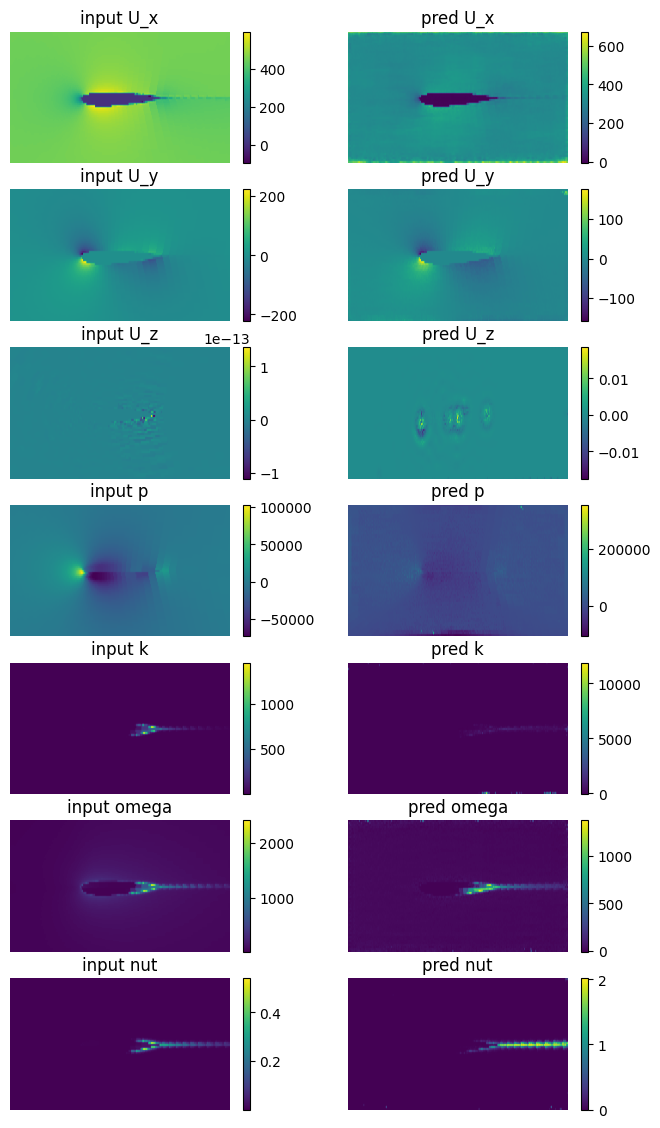

In [33]:
pred=np.load(mainfolder+'/pred.npy')
data=data*normal
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [34]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_ssim_seperate_0
airFoil_450_ssim_seperate_20
folder airfoil2d/airFoil_450_ssim_seperate/21 was created
write airfoil2d/airFoil_450_ssim_seperate/21/U
write airfoil2d/airFoil_450_ssim_seperate/21/p
write airfoil2d/airFoil_450_ssim_seperate/21/k
write airfoil2d/airFoil_450_ssim_seperate/21/omega
write airfoil2d/airFoil_450_ssim_seperate/21/nut
